# Fordgobike-tripdata 
## by (Abdulalim Mohamed)

## Preliminary Wrangling

> This document explores a dataset including time, stations, and users' attributes for 183412 trips.

In [162]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import datetime
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [163]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [164]:
df.shape

(183412, 16)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [166]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [167]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### The structure of the dataset

> This dataset includes 183412 trips with 16 columns.



 
The time variables in this dataset are all string. They need to be converted to datetime format for the analysis.
The time variables can be broken down into time of day, day of the week, or month of the year.
The dataset provides membership birth year, so ages can be derived by using the year of the dataset 2019
### The main feature(s) of interest in the dataset

 The main feature(s) of interest in the dataset
 
I am most interested in figuring out when and where are most trips taken because this dataset includes start time/location and end time/location. I focus on the starting points first.

Also, I am interested in what are the characteristics (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations.

How long does average trip take?

What is the day with the fewest trips?

Does User Type (Subscriber or Customer) affect the duration?

Do Age and Sex of user affect the duration?

Do season (time of the year) affect the duration?


### The features in the dataset help to support the investigation into the feature(s) of interest 

I expect the Caltrain or Bart stations in San Francisco will have more trips than other locations because those stations are in the center of the city and connect to other major transportations. Morning and afternoon will have more trips than night time due to rush hours. Also, I assume younger riders are more than older riders because of physical abilities

In [168]:
# 1. Convert time variables from string to datetime  
# Convert start_time column  from string to datetime
# month of the year
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [169]:
# 1. Convert time variables from string to datetime  
# Convert end_time column  from string to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

In [170]:
#check changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [171]:
# Test: take a loo at start_month_num and start_month_char
print(df['start_month_num'].value_counts())
print(df['start_month_char'].value_counts())

2    183412
Name: start_month_num, dtype: int64
Feb    183412
Name: start_month_char, dtype: int64


###### All trips in Feb 

## Univariate Exploration

 looking at the distribution of trip duration

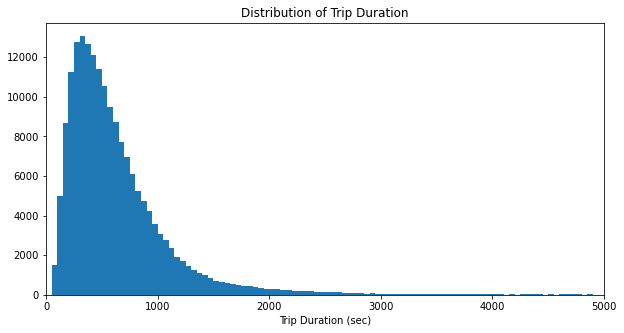

In [172]:
# plot the distribution of trip duration
binsize = 50
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim(0, 5000)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

The distribution is right-skewed, with a really long tail

It was very difficult to view the plot, I had to reduce the bin size to 50 and put a limit of 5000 on x-axis. I will change the trip duration variable to minute instead of second.

In [173]:
# change trip duration variable from second to minute
df['duration_min'] = df['duration_sec'] / 60


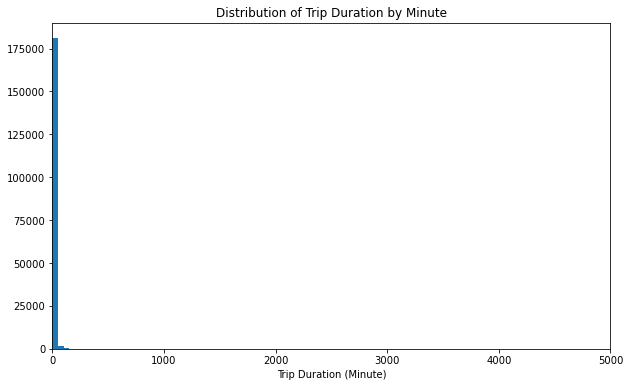

In [174]:
# plot the distribution of trip duration by minute
binsize = 50
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlim(0, 5000)
plt.xlabel('Trip Duration (Minute)')
plt.title('Distribution of Trip Duration by Minute')
plt.show();

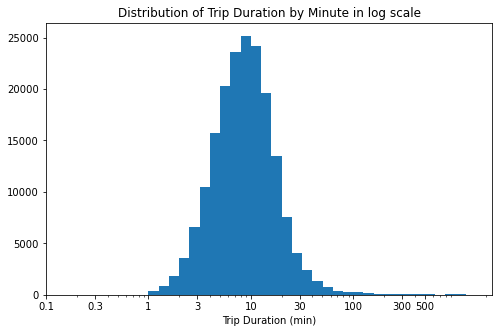

In [175]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,500]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration by Minute in log scale')
plt.show();

The trip duration has a long-tailed distribution right-skew 

The average duration around 10 minutes.


In [176]:
# Day of the week
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

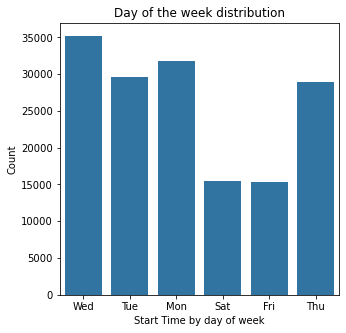

In [177]:
#Time by day of week  
base_color = sb.color_palette()[0]
plt.figure(figsize=[5, 5])
sb.countplot(data=df, x='start_weekday_char', color=base_color)

plt.xlabel('Start Time by day of week')
plt.ylabel('Count')
plt.title('Day of the week distribution');

###### Note that the two days, Saturday and Sunday, are the fewest trips

In [178]:
#  distribution of user type
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [179]:
Subscriber= df.query("user_type=='Subscriber'").count()[0]/df['user_type'].shape[0]
Subscriber_ratio= '{:0.1f}%'.format(100*Subscriber) 
Subscriber_ratio

'89.2%'

In [180]:
Customer= df.query("user_type=='Customer'").count()[0]/df['user_type'].shape[0]
Customer_ratio= '{:0.1f}%'.format(100*Customer) 
Customer_ratio

'10.8%'

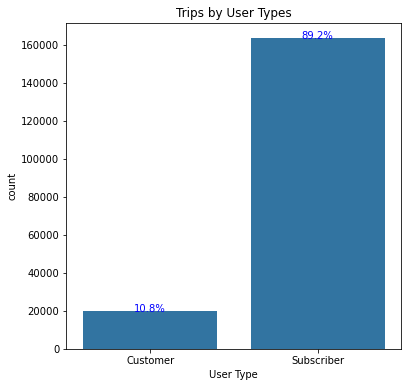

In [181]:
# plot distribution of user type
plt.figure(figsize=[6, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)

# print frequency on the bar chart
n_points = df.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b')

plt.title('Trips by User Types')
plt.xlabel('User Type')
plt.show()

###### 89.2% of the users in 2019 were Subscriber , while the rest (10.8%) were Customer

###### The next variables that I want to look at is the gender of the users.

In [182]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

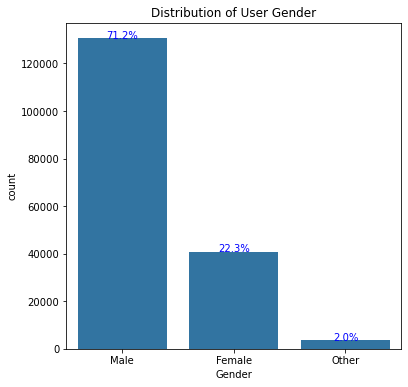

In [183]:
# plot distribution of gender
plt.figure(figsize=[6, 6])

base_color = sb.color_palette()[0]
gen_order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order=gen_order)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')

# print frequency on the bar chart
n_points = df.shape[0]
gender_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()

###### 71% of the users are male and 22.3% of the users are female.

In [184]:
df["member_birth_year"]

0         1984.0
1            NaN
2         1972.0
3         1989.0
4         1974.0
           ...  
183407    1996.0
183408    1984.0
183409    1990.0
183410    1988.0
183411    1989.0
Name: member_birth_year, Length: 183412, dtype: float64

In [185]:
df['age'] = df.member_birth_year.map(lambda x: 2019-x)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month_num,start_month_char,duration_min,start_weekday_num,start_weekday_char,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2,Feb,869.750000,3,Wed,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2,Feb,708.683333,3,Wed,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2,Feb,1030.900000,3,Wed,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2,Feb,608.166667,3,Wed,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2,Feb,26.416667,3,Wed,45.0


In [186]:
# min and max age 
df['age'].min(),df['age'].max()

(18.0, 141.0)

In [187]:
df['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

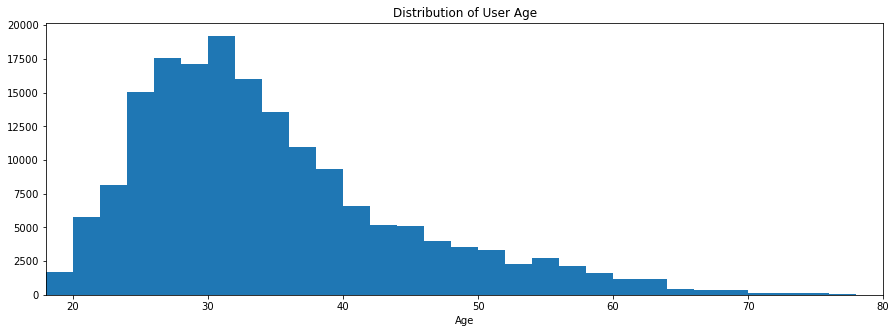

In [188]:
# plot distribution of age
plt.figure(figsize = [15, 5])

binsize = 2
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(data = df, x = 'age', bins = bins)
plt.xlim(18, 80)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()

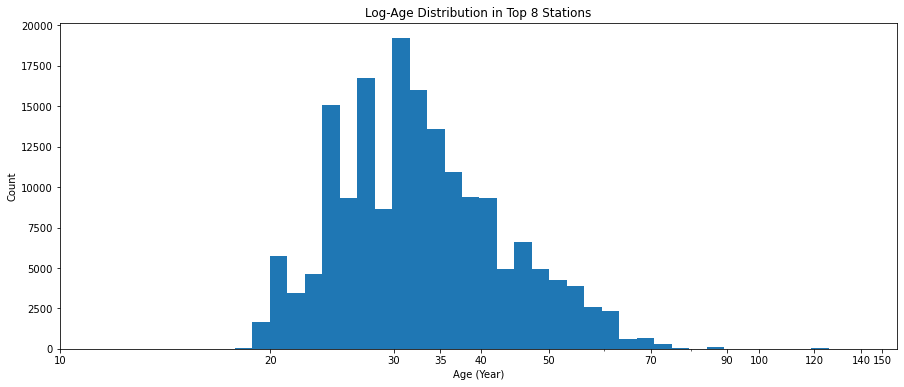

In [189]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 6])
plt.hist(data = df, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100,120,140,150], [10,20,30,35,40,50,70,90,100,120,140,150])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Log-Age Distribution in Top 8 Stations');

###### From the figure, most of riders are around 30 years old. Even though there are some riders ages older than 120 years old looks like high outliers, before checking their physical abilities data, I will keep them in the dataset.

In [190]:
# There are some bikers with age older than 90 years old. Let's count them.
df.query('age > 90').count()[0], df.query('age > 100').count()[0],df.query('age > 120').count()[0],df.query('age > 140').count()[0]

(77, 72, 1, 1)

In [191]:
# Location: there are 329 start stations. 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

###### There are 329 start stations in this dataset.

In [192]:
# Do they have high traffics as end stations? Looks like yes!
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

###### There are 329 end stations in this dataset.

In [193]:
#Subset the dataset by keeping only top 5 locations with high traffics, df_top5. 
star_location=['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
               'Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
end_location=['San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St',
             'Montgomery St BART Station (Market St at 2nd St)','San Francisco Ferry Building (Harry Bridges Plaza)','Powell St BART Station (Market St at 4th St)']
df_top5_start = df.loc[df['start_station_name'].isin(star_location)]
df_top5_end = df.loc[df['start_station_name'].isin(end_location)]

In [194]:
# Test and see if only keep top 5 station
df_top5_start['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64

In [195]:
# Test and see if only keep top 5 station
df_top5_end['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
Name: start_station_name, dtype: int64

In [196]:
# After subsetting top 5 station with the most trip, create a countplot to see the distribution and order from top 1 to top 5
df_top5_start_counts = df_top5_start['start_station_name'].value_counts()
df_top5_start_order = df_top5_start_counts.index
df_top5_start_order

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)'],
      dtype='object')

In [197]:
# After subsetting top 5 station with the most trip, create a countplot to see the distribution and order from top 1 to top 5
df_top5_end_counts = df_top5_end['start_station_name'].value_counts()
df_top5_end_order = df_top5_end_counts.index
df_top5_end_order

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)'],
      dtype='object')

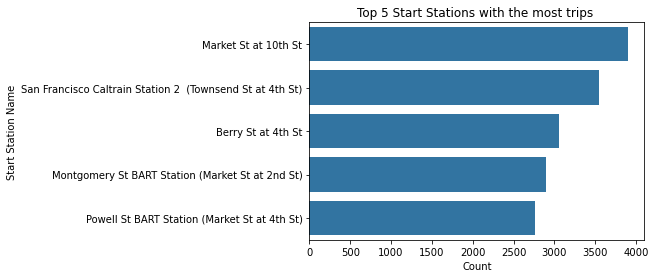

In [198]:
#plot top 5 Start Station Name
base_color = sb.color_palette()[0]
sb.countplot(data = df_top5_start, y='start_station_name', color=base_color, order=df_top5_start_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 5 Start Stations with the most trips ');

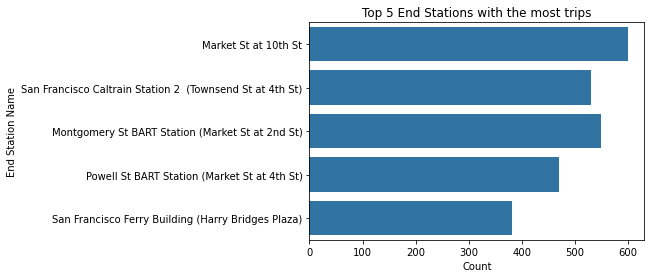

In [199]:
#plot top 5 end Station Name
base_color = sb.color_palette()[0]
sb.countplot(data=df_top5_end, y='end_station_name', color=base_color, order=df_top5_end_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 5 End Stations with the most trips');

Transformations.

The variables, age and duration_sec, look like right skewed, so I look into these two variables using a log transform. Under the transformations, age's data has one big peak between 30 and 40 years old and some small peak. Duration's data mean = 10 minutes.

### Data Cleaning

I did change the duration variable from seconds to minutes - i keep both of them -  because seconds are just too unreasonable to measure a trip duration. I also engineered new variables: duration_min, start_month_char,start_month_num, start_weekday_char, start_weekday_num  and age from existing variabes.

For the age distribution, there are 77 riders older than 90 . They look like outliers. However, before I acquire their physical abilities' data, I think it is fair enough to keep them in the dataset.


For the gender groups, there is a 'Other' category. Before I confirm the information, I will keep them in the dataset.

I am most interested in the most traffic locations. After looking into trips count in each station, I pick top 5 Start stations and 5 End stations  over 183412 trips.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###### I want to look at how trip duration is affected by day of week

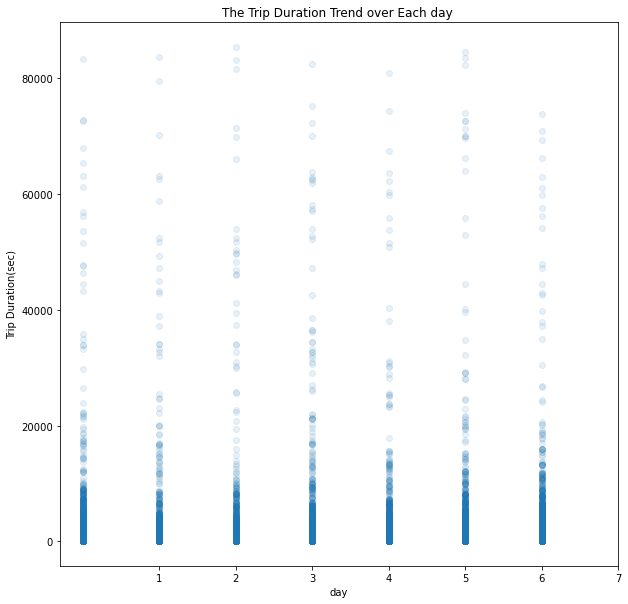

In [200]:
# check the trip duration over each day.
plt.figure(figsize = [10,10])
plt.scatter(data = df, x = 'start_weekday_num' , y = 'duration_sec' , alpha = 0.1)
tick_labels = [1, 2, 3, 4, 5, 6,7]
plt.xticks(tick_labels, tick_labels)
plt.title('The Trip Duration Trend over Each day ')
plt.xlabel('day')
plt.ylabel('Trip Duration(sec)');

###### From the weekday vs duration scatter plot, the duration is equal offer days

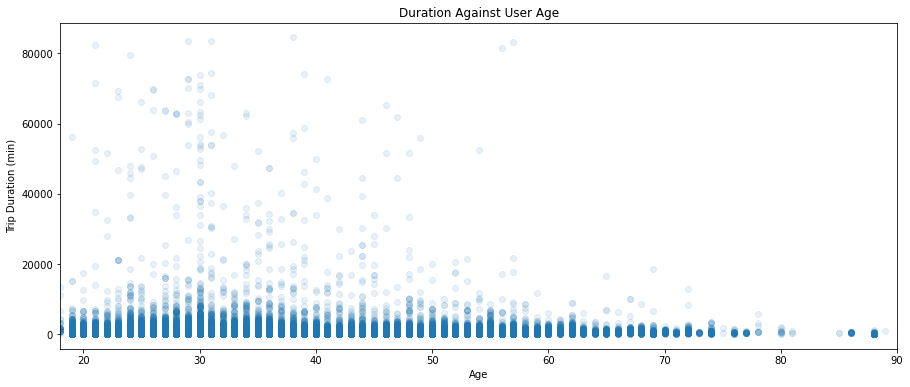

In [201]:
# scatter plot of duration vs. age
plt.figure(figsize = [15, 6])
plt.scatter(data = df, x = 'age', y = 'duration_sec', alpha = 1/10)
plt.xlabel('Age')
plt.xlim(18, 90)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()

###### Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.

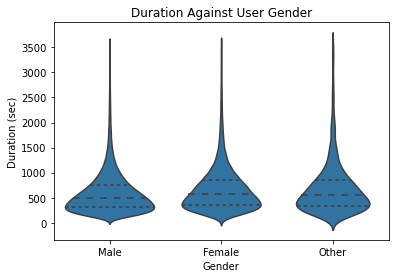

In [202]:
# query the data for duration only below 1 hour to focus the data
df_hour = df.query("duration_sec < 3600")
# plot relationship between gender and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=df_hour, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User Gender');

In [203]:
# Prepare lists of numeric variables and categorical variables
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char','start_month_char']
users_chr = ['user_type','member_gender']

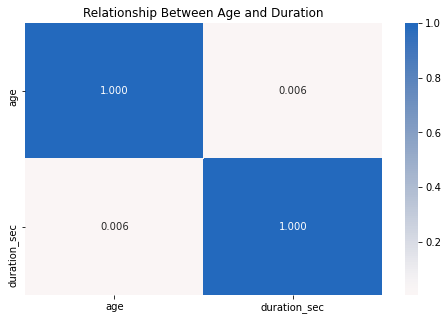

In [204]:
# Numeric variables: correlation between age and duration second
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

###### Although in previous section it was shown that 70% of the users were male, but the trip duration does not seem to be affected by the user gender. The violin plots look similar for these 3 gender categories, with the median all similar (around 10 minutes).

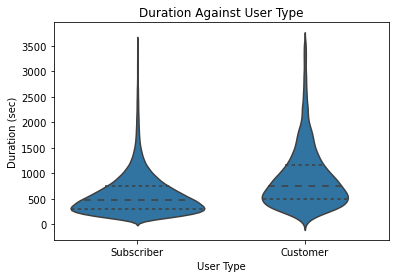

In [205]:
# plot relationship between user type and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=df_hour, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration Against User Type');

###### Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but the customer users might be tourists that use the bikes for traveling around town.

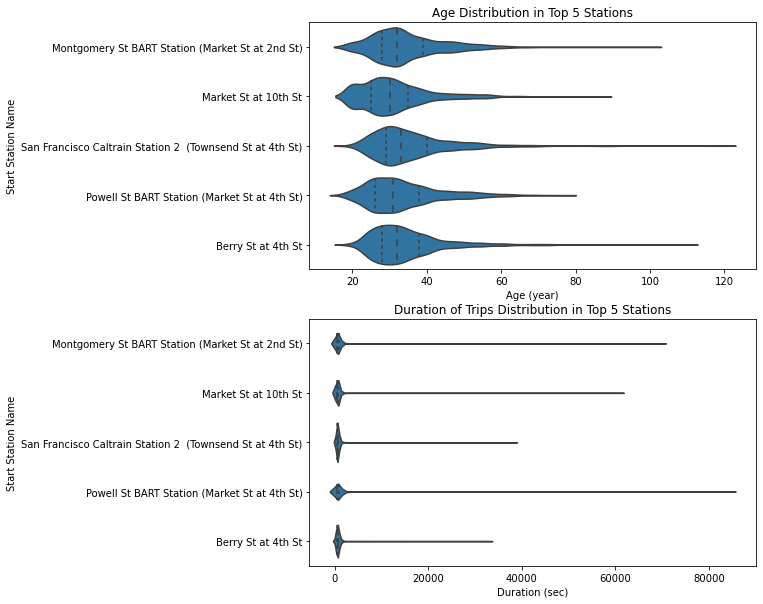

In [208]:
# Numeric variables by plotting violin plot to see the distributions: 
# Top 5 stations by age, 
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_top5_start, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (year)')
plt.ylabel('Start Station Name')
plt.title('Age Distribution in Top 5 Stations')

ax = plt.subplot(212)
sb.violinplot(data=df_top5_start, y='start_station_name', x='duration_sec', inner='quartile',color=base_color)
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 5 Stations');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration had a surprisingly low amount of correlation with the season. There is no significant difference between the duration in each day.  I also suspected that due to high frequency of subscriber users compared to customer, the riders were all regular users who need to use the bikes for their commutes regardless of the weather.

There was also an interesting relationship observed between duration and the categorical features. For genders, the trip duration does not seem to differ between Female, Male, and Other. For user type, Customer type has more trip duration than Subscriber type, and this is caused by the regularities in Subscriber trips, while Customer trips might be more random.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There is not interesting relationship between other feature.

## Multivariate Exploration

> I want to investigate on the relationship between the trip duration and the age and gender of the users.

In [211]:
# generate a new field for member age group
df['member_age_bins'] = df['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 50<x<=70
                                                  else '70 - 80' if 50<x<=80  
                                                  else '80 - 90' if 50<x<=90
                                                  else '>90' )

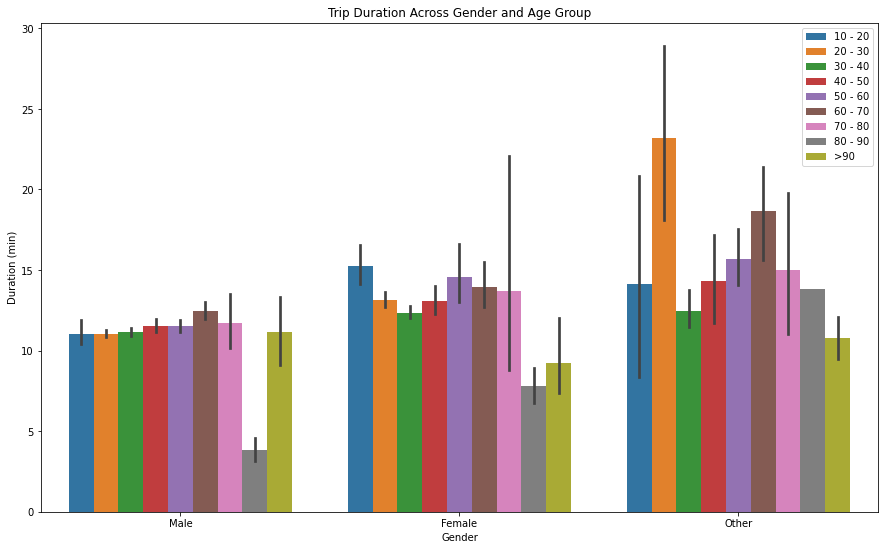

In [214]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [15, 9])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=df.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

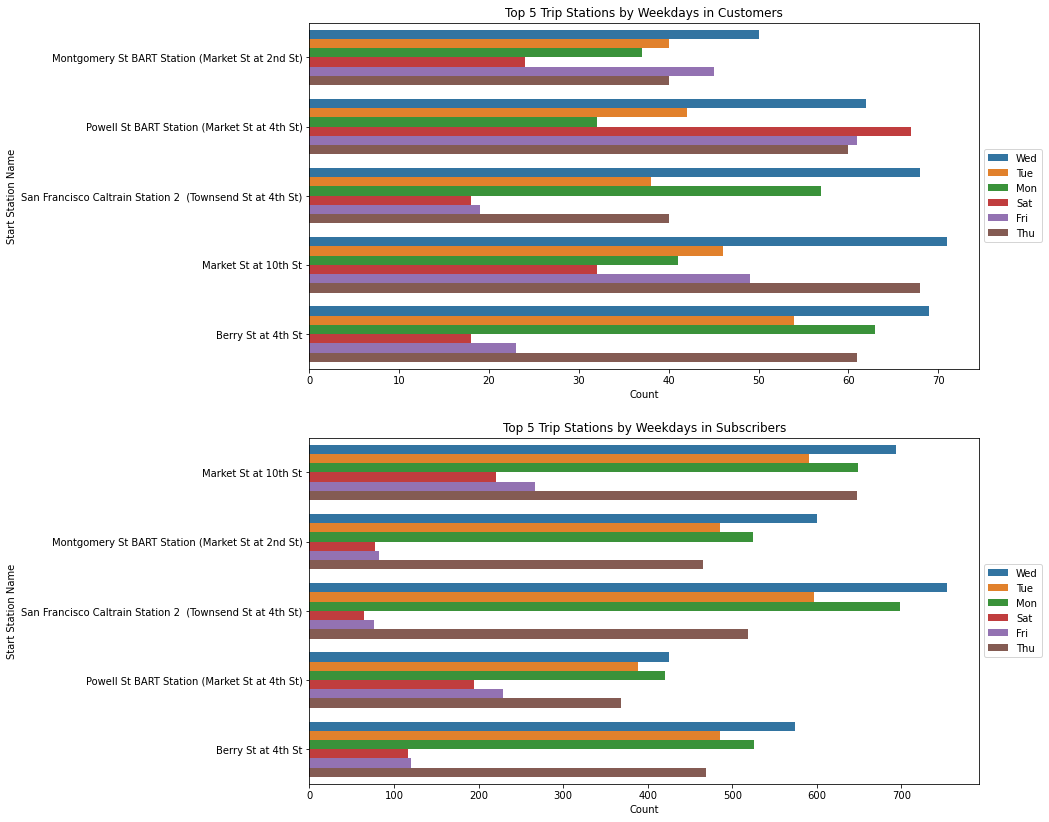

In [215]:
# Top 5 trip stations by times: separate user types and take a look customers and subscribers individually
df_cust = df_top5_start.query('user_type == "Customer"')
df_sub = df_top5_start.query('user_type == "Subscriber"')
# categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Weekdays in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 5 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

###### Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In Female , the age range of 10-20 has the longest trip duration ,in other the age range of 20-30 has the longest trip duration, this is maybe due to the young age still has more stamina, so they tend to ride the bikes longer either for recreation or for school.

### Were there any interesting or surprising interactions between features?

> My biggest surprise was that the longest trip duration in male actually belongs to the 60-70 age group. I would have thought that Users with age 20-30 would have the longest duration. 

## Conclusion

In 2019, the average trip duration that the users took was around 10 minutes.  

89.2% of the total trips were taken by Subscribers, which are members of the GoBike program.

Also, the age group with the most trips was between 30-35 years old.


The Customers users (casual users) usually took more time in their rides than Subscribers.

In Female , the age range of 10-20 has the longest trip duration.
The longest trip duration in male belongs to the 60-70 age group.
Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.